In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.animation as animation
plt.rcParams['animation.html'] = 'html5'

In [2]:
κ = 400
ρ = 8960
Cp = 386
tz = 0.01
σ = 5.670373e-8
ϵ = 0.5
hc = 1
Ta = 300
α = κ/(ρ*Cp)
α

0.00011565507031828275

In [3]:
width, height = 1, 1
nx, ny = 51, 51

x = np.linspace(0,width,nx)
y = np.linspace(0,height,ny)
X, Y = np.meshgrid(x, y)

In [4]:
Tn = np.zeros((ny,nx))
Tnp1 = np.zeros((ny,nx))

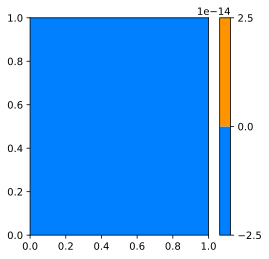

In [5]:
fig = plt.figure(figsize=(4,4))
temp = plt.contourf(X,Y,Tn,cmap=plt.cm.jet,origin='lower')
plt.colorbar(temp)

# Boundary conditions

+ Neumann condition - Zero heat flux on vertical faces (left and right) and top face
+ Dirichlet condition - Constant temperature, T = 1000 K on bottom edge

In [6]:
Tn[0,:] = 1000
Tn[:,0] = Tn[:,1]
Tn[:,-1] = Tn[:,-2]
Tn[-1,:] = Tn[-2,:]

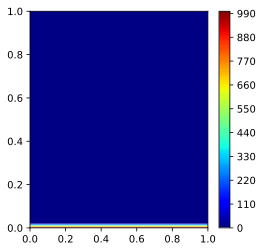

In [7]:
fig = plt.figure(figsize=(4,4))
temp = plt.contourf(X,Y,Tn,levels=100,cmap=plt.cm.jet,origin='lower')
plt.colorbar(temp)

In [8]:
dx = x[1] - x[0]
dy = y[1] - y[0]
dx2 = dx*dx
dy2 = dy*dy

factor = 0.8
dt = factor*(dx2*dy2)/(2.*α*(dx2+dy2))
dt

0.6917120000000001

In [9]:
Tn = np.zeros((ny,nx))
Tn[0,:] = 1000
Tn[:,0] = Tn[:,1]
Tn[:,-1] = Tn[:,-2]
Tn[-1,:] = Tn[-2,:]
Tnp1 = np.zeros((ny,nx),dtype=float)

Ttop = []
Ttop.append(Tn[-1,:])

tstart, tend = 0.0, 5000.0
t = tstart

while t < tend:
    Tnp1[1:-1,1:-1] = Tn[1:-1,1:-1] + dt*(α*( (Tn[1:-1,2:] - 2.*Tn[1:-1,1:-1] + Tn[1:-1,:-2])/dx2 \
                      + (Tn[2:,1:-1] - 2.*Tn[1:-1,1:-1] + Tn[:-2,1:-1])/dy2 ) - ((2.*hc)/(ρ*Cp*tz))*(Tn[1:-1,1:-1] - Ta)
                      - ((2.*ϵ*σ)/(ρ*Cp*tz))*(Tn[1:-1,1:-1]**4. - Ta**4.) )
    Tnp1[0,:] = 1000
    Tnp1[:,0] = Tnp1[:,1]
    Tnp1[:,-1] = Tnp1[:,-2]
    Tnp1[-1,:] = Tnp1[-2,:]
    Tn = Tnp1.copy()
    Ttop.append(Tnp1[-1,:])
    t += dt

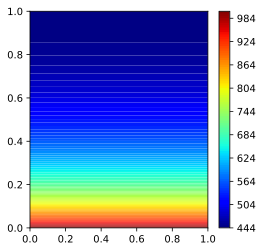

In [10]:
fig = plt.figure(figsize=(4,4),dpi=600)
temp = plt.contourf(X,Y,Tnp1,levels=100,cmap=plt.cm.jet)
plt.colorbar(temp)

# Temperature as a function of the Y-Coordinate 

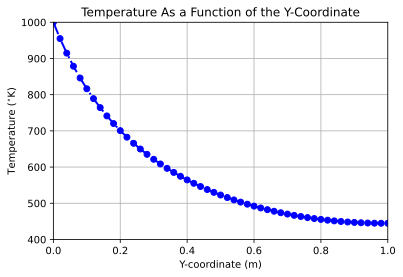

In [11]:
plt.plot(x,Tnp1[:,int(nx/2)],'b-.o',lw=2)
plt.xlabel('Y-coordinate (m)')
plt.ylabel('Temperature ($^{\circ}$K)')
plt.xlim([0,1])
plt.ylim([400,1000])
plt.title('Temperature As a Function of the Y-Coordinate')
plt.grid(True)

# Temperature along the Top Edge of the Plate as a Function of Time

In [12]:
Ttop = np.asarray(Ttop)
Ttop.shape

(7230, 51)

In [13]:
Ttop_avg = Ttop.mean(axis=1)
Ttop_avg.shape

(7230,)

In [14]:
t = np.arange(tstart,tend+dt,dt)
t.shape

(7230,)

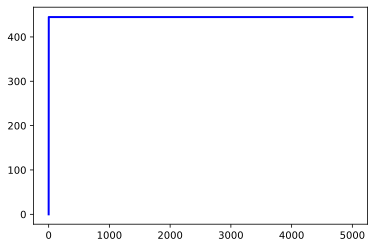

In [15]:
plt.plot(t,Ttop_avg,'b-',lw=2)

In [16]:
Ttop

array([[  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ],
       [444.8178049, 444.8178049, 444.8178049, ..., 444.8178049,
        444.8178049, 444.8178049],
       [444.8178049, 444.8178049, 444.8178049, ..., 444.8178049,
        444.8178049, 444.8178049],
       ...,
       [444.8178049, 444.8178049, 444.8178049, ..., 444.8178049,
        444.8178049, 444.8178049],
       [444.8178049, 444.8178049, 444.8178049, ..., 444.8178049,
        444.8178049, 444.8178049],
       [444.8178049, 444.8178049, 444.8178049, ..., 444.8178049,
        444.8178049, 444.8178049]])